In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize 
import re

# Часть 1 Подбираем параметры для длины связи

Сгенерируем 20 inp файлов проварьировав длину связи С-С от 1.3 до 1.68 ангстрем (включительно), чтобы реальное значение - 1.5 находилось примерно в середине нашего диапазона

In [56]:
for length in np.round(np.arange(1.3,1.7,0.02),2):
    inp = f'''!HF RHF 6-31G
    * int 0 1
    C 0 0 0 0 0 0 
    C 1 0 0 {length} 0 0 
    H 1 2 0 1.08439 111.200 0
    H 1 2 3 1.08439 111.200 120
    H 1 2 3 1.08439 111.200 -120
    H 2 1 3 1.08439 111.200 180
    H 2 1 6 1.08439 111.200 120
    H 2 1 6 1.08439 111.200 -120
    *
    '''
    with open(f"./task_6/length_CC_{length}.inp","w") as newfile:
        newfile.write(inp)

Запустим orca на все эти файлы и запишем результат. Не делаю этого в ноутбуке при помощи subprocess, так как в корневой директории в папке srv из терминала юпитера нет директории с orca. Видимо кодомо по ssh и кодомо с юпитером живут в разных файловых системах

Покажу как выглядит bash скрипт,которым я запускаю orca

In [1]:
! cat ./task_6/task_6_cc.sh

#!/bin/bash
for file in ./length_CC*.inp
do
touch ./${file}.result
orca $file > ./${file}.result
done




Считаем файлы с результатом .result  и найдем там энергию, запишем ее в список

In [61]:
energy_list = []
for file in np.round(np.arange(1.3,1.7,0.02),2):
    result = open(f"./task_6/task_6/length_CC_{file}.inp.result")
    result = list(filter(lambda x: "FINAL SINGLE POINT ENERGY" in x, result.read().split("\n")))
    result = float(result[0].split(" ")[-1])
    energy_list.append(result)

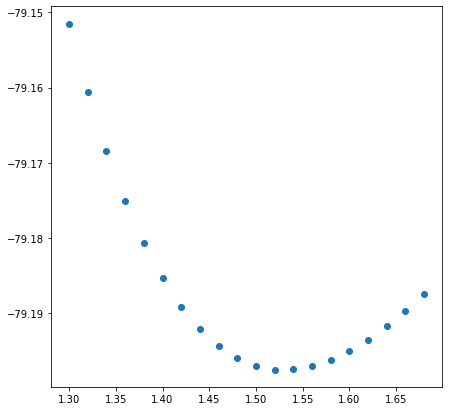

In [62]:
f, ax = plt.subplots(1,1, figsize=(7, 7))
plt.scatter(np.round(np.arange(1.3,1.7,0.02),2), energy_list)

Optimized params: [  0.74850601   1.54310987 -79.1988906 ]


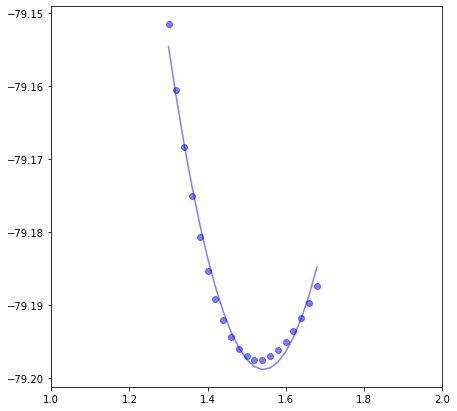

In [63]:
#function is  f(x)=k(b-x)^2 + a
fitfunc = lambda p, x: p[0]*pow(p[1]-x,2) + p[2] # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Error function

p0 = [1,-79, 1] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc,
                               p0[:],
                               args=(np.round(np.arange(1.3,1.7,0.02),2), energy_list))
print("Optimized params:", p1)

#Plot it
f, ax = plt.subplots(1,1, figsize=(7, 7))
plt.plot(np.round(np.arange(1.3,1.7,0.02),2),
         energy_list,
         "ro",
         np.round(np.arange(1.3,1.7,0.02),2),
         fitfunc(p1, np.round(np.arange(1.3,1.7,0.02),2)),
         "r-",
         c='blue',
         alpha=0.5)

plt.xlim(1,2)
plt.show()


Мне не очень нравится, как оно зафиттилось. По всей видимости потому что мы пытаемся зафиттить параболой функцию, которая не парабола. Чтобы зафиттить именно тот интервал который похож на параболу выкинем часть точек с начала участка. 

Optimized params: [  0.56550404   1.54117218 -79.19756056]


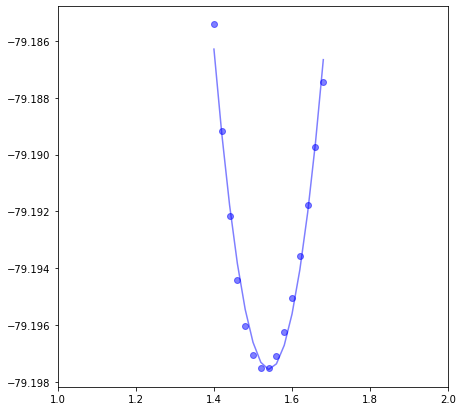

In [64]:
#function is  f(x)=k(b-x)^2 + a
x = np.round(np.arange(1.3,1.7,0.02),2)[5:]
y = energy_list[5:]
fitfunc = lambda p, x: p[0]*pow(p[1]-x,2) + p[2] # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Error function

p0 = [1,-79, 1] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc,
                               p0[:],args=(x,y))
print("Optimized params:", p1)

#Plot it
f, ax = plt.subplots(1,1, figsize=(7, 7))
plt.plot(x,
         y,
         "ro",
         x,
         fitfunc(p1, x),
         "r-",
         c='blue',
         alpha=0.5)

plt.xlim(1,2)
plt.show()


Вот теперь неплохо

# Часть 2 Подбираем параметры для валентного угла

Сгенерируем файлы inp с валентным углом HCC меняющимся от 109.2 до 113.4 с шагом 0.1

In [65]:
for angle in np.round(np.arange(109.2,113.4,0.1),1):
    inp = f'''!HF RHF 6-31G
    * int 0 1
    C 0 0 0 0 0 0 
    C 1 0 0 1.52986 0 0 
    H 1 2 0 1.08439 {angle} 0
    H 1 2 3 1.08439 111.200 120
    H 1 2 3 1.08439 111.200 -120
    H 2 1 3 1.08439 111.200 180
    H 2 1 6 1.08439 111.200 120
    H 2 1 6 1.08439 111.200 -120
    *
    '''
    with open(f"./task_6/angle_HCC_{angle}.inp","w") as newfile:
        newfile.write(inp)

Покажу как выглядит bash скрипт,которым я запускаю orca

In [2]:
! cat ./task_6/task_6_hcc.sh

#!/bin/bash
for file in ./angle_HCC*.inp
do
touch ./${file}.result
orca $file > ./${file}.result
done




In [68]:
energy_list_hcc = []
for file in np.round(np.arange(109.2,113.4,0.1),1):
    result = open(f"./task_6/task_6/angle_HCC_{file}.inp.result")
    result = list(filter(lambda x: "FINAL SINGLE POINT ENERGY" in x, result.read().split("\n")))
    result = float(result[0].split(" ")[-1])
    energy_list_hcc.append(result)

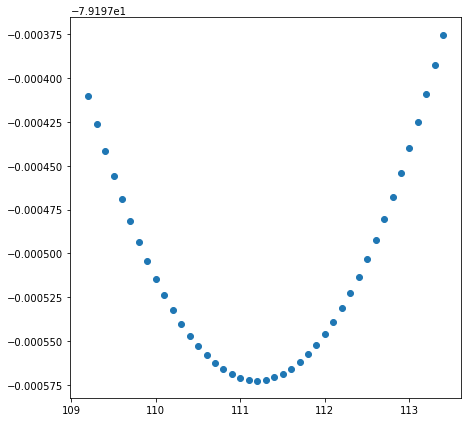

In [69]:
f, ax = plt.subplots(1,1, figsize=(7, 7))
plt.scatter(np.round(np.arange(109.2,113.4,0.1),1), energy_list_hcc)

Optimized params: [ 4.06004077e-05  1.11195368e+02 -7.91975724e+01]


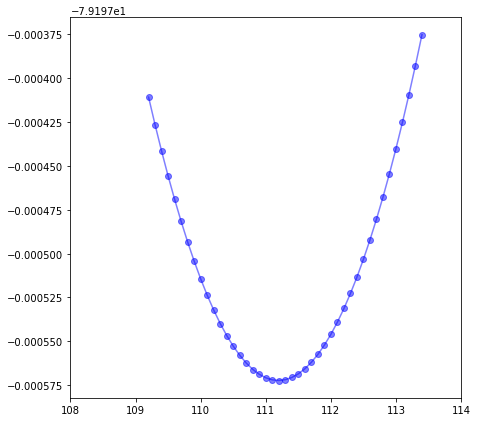

In [70]:
#function is  f(x)=k(b-x)^2 + a
fitfunc = lambda p, x: p[0]*pow(p[1]-x,2) + p[2] # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Error function

p0 = [1,-79, 1] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc,
                               p0[:],
                               args=(np.round(np.arange(109.2,113.4,0.1),1), energy_list_hcc))
print("Optimized params:", p1)

#Plot it
f, ax = plt.subplots(1,1, figsize=(7, 7))
plt.plot(np.round(np.arange(109.2,113.4,0.1),1),
         energy_list_hcc,
         "ro",
         np.round(np.arange(109.2,113.4,0.1),1),
         fitfunc(p1, np.round(np.arange(109.2,113.4,0.1),1)),
         "r-",
         c='blue',
         alpha=0.5)

plt.xlim(108,114)
plt.show()


# Часть 3 подбираем параметры для торсионного угла

In [59]:
for torsion in np.round(np.arange(-180,181,6),1):
    inp = f'''!HF RHF 6-31G
    * int 0 1
    C 0 0 0 0 0 0 
    C 1 0 0 1.52986 0 0 
    H 1 2 0 1.08439 111.200 0
    H 1 2 3 1.08439 111.200 120
    H 1 2 3 1.08439 111.200 -120
    H 2 1 3 1.08439 111.200 {torsion}
    H 2 1 6 1.08439 111.200 120
    H 2 1 6 1.08439 111.200 -120
    *
    '''
    with open(f"./task_6/torsion_HCCH_{torsion}.inp","w") as newfile:
        newfile.write(inp)

In [3]:
! cat ./task_6/task_6_hcch.sh

#!/bin/bash
for file in ./torsion_HCCH*.inp
do
touch ./${file}.result
echo $file
orca $file > ./${file}.result
done




(-250.0, 250.0)

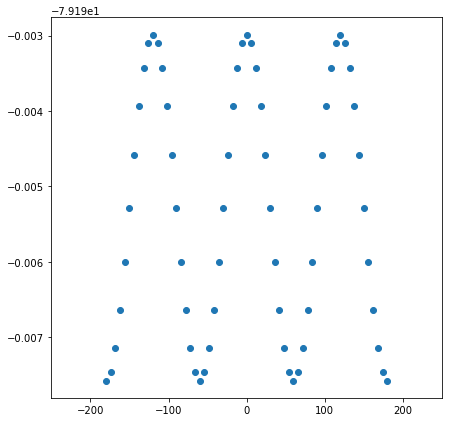

In [72]:
energy_list_hcch = []
for file in np.round(np.arange(-180,181,6),1):
    result = open(f"./task_6/task_6/torsion_HCCH_{file}.inp.result")
    result = list(filter(lambda x: "FINAL SINGLE POINT ENERGY" in x, result.read().split("\n")))
    try:
        result = float(result[0].split(" ")[-1])
        energy_list_hcch.append(result)
    except IndexError:
        print(file)
        energy_list_hcch.append(np.nan)
f, ax = plt.subplots(1,1, figsize=(7, 7))
plt.scatter(np.round(np.arange(-180,181,6),1),
            energy_list_hcch)
ax.set_xlim(-250,250)

Optimized params: [ 4.58434386e-03  9.54986780e-01  1.34570160e-02 -7.91975765e+01]


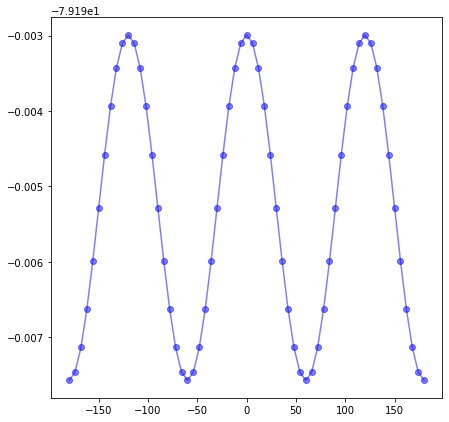

In [75]:
#function is  f(x)=k/2 * (1+cos(n*x - g)) + a

fitfunc = lambda p, x: p[0] / 2 * (1 + np.cos(np.radians(p[1] * np.pi * x - p[2]))) + p[3]# Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Error function

p0 = [1,1, 1,1] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc,
                               p0[:],
                               args=(np.round(np.arange(-180,
                                                        181,
                                                        6),1),
                                     energy_list_hcch))
print("Optimized params:", p1)

#Plot it
f, ax = plt.subplots(1,1, figsize=(7, 7))
plt.plot(np.round(np.arange(-180,181,6),1),
         energy_list_hcch,
         "ro",
         np.round(np.arange(-180,181,6),1),
         fitfunc(p1, np.round(np.arange(-180,181,6),1)),
         "r-",
         c='blue',
         alpha=0.5)

plt.show()
    

Отлично получилось.

# Параметры для длины связи с шагом 0.1

In [95]:
for length in np.round(np.arange(0.1,3.1,0.1),2):
    inp = f'''!HF RHF 6-31G
    * int 0 1
    C 0 0 0 0 0 0 
    C 1 0 0 {length} 0 0 
    H 1 2 0 1.08439 111.200 0
    H 1 2 3 1.08439 111.200 120
    H 1 2 3 1.08439 111.200 -120
    H 2 1 3 1.08439 111.200 180
    H 2 1 6 1.08439 111.200 120
    H 2 1 6 1.08439 111.200 -120
    *
    '''
    with open(f"./task_6/length_CC_step01_{length}.inp","w") as newfile:
        newfile.write(inp)

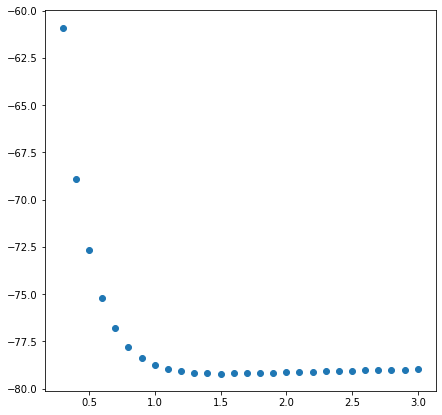

In [101]:
energy_list_full = []
for file in np.round(np.arange(0.1,3.1,0.1),2):
    result = open(f"./task_6/length_CC_step01_{file}.inp.result")
    result = list(filter(lambda x: "FINAL SINGLE POINT ENERGY" in x, result.read().split("\n")))
    try:
        result = float(result[0].split(" ")[-1])
        energy_list_full.append(result)
    except IndexError:
        print(file)
        energy_list_full.append(np.nan)
f, ax = plt.subplots(1,1, figsize=(7, 7))
plt.scatter(np.round(np.arange(0.1,3.1,0.1),2)[2:],
            energy_list_full[2:])

Убрали первые несколько точек во время демонстрации, потому что там значения энергии очень большие
Используем для аппроксимации функцию потенциала Морзе, ведь именно она описывает энергию связи в зависимости от ее длины

Optimized params: [-5.14884035e+03  5.28862634e+00 -8.99778601e-01  5.06972677e+03]


/home/ferryman/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:475: RuntimeWarning: Number of calls to function has reached maxfev = 1000.
  warnings.warn(errors[info][0], RuntimeWarning)


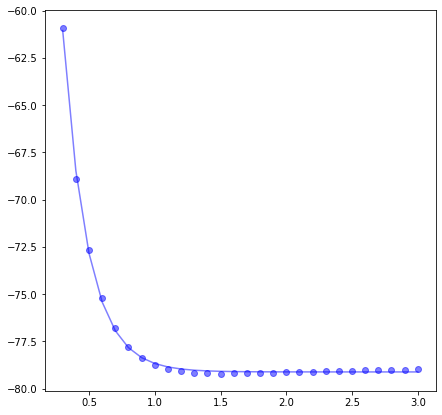

In [104]:
#function is  morze potential

fitfunc = lambda p, x: p[0] * (1 - np.exp(- p[1] * (x - p[2]))) ** 2 + p[3] # Target function
errfunc = lambda p, x, y: fitfunc(p, x) - y # Error function
x = np.round(np.arange(0.1,3.1,0.1),2)[2:]
y = energy_list_full[2:]

p0 = [1,1,1,1] # Initial guess for the parameters
p1, success = optimize.leastsq(errfunc,
                               p0[:],
                               args=(x,y))
print("Optimized params:", p1)

#Plot it
f, ax = plt.subplots(1,1, figsize=(7, 7))
plt.plot(x,
         y,
         "ro",
         x,
         fitfunc(p1, x),
         "r-",
         c='blue',
         alpha=0.5)
plt.show()
    

Получилось хорошо

# Заключение
Мы провели аппроксимацию зависимости энергии молекулы от длины связи, величины ковалентного угла и торсионного угла и узнали параметры функций зависимости, которые теперь можно было бы использовать для ММ расчетов.
Ссылка на результаты счета https://kodomo.fbb.msu.ru/~tinaferryman/term8/task_6/